# What is the Best Learning Rate for the K-Armed Bandit Problem.

## Notebook Overivew

This notebook provides an introduction to the k-armed bandit problem, a foundational problem in reinforcement learning. 

### Problem Description

Here, the term 'bandit' might be misleading, it refers to an American term for a slot machine. Imagine a slot machine with many buttons and when one of these buttons is pressed the slot machine spins and displays a value on it's screen. You begin to experiment with the buttons and notice that some of the buttons are consistently returning higher values that others. The question is now asked if you could only press the buttons 1000 times what strategy would you implement to recieve the highest possible score, that is the sum of the values you see.

This forms the basis for the 'k-armed bandait problem'.

It is worth noting that the buttons do not necessarily return the same score each time, there is some manner of variation although the buttons do not return random values either, it is implicit that some buttons are better than others.

### Mathematical Description



## Experiement Planning

### Variables
* k := number of leavers.
* Ri := the reward function of the ith leaver. This can be deterministic or stochastic. Determinism is a special case of stochastic. 
*  epsilon: the probability of exploration vs exploitation.

### Control Variables:
* 7 arms.
* Normal Distributions for the reward distribution.(These can't all be the same.)
* Number of episodes: 1000

### Dependent Variable: 
* epsilon - fixed epsilon (0 < epsilon < 1); epsilon as a function of t, where t is the time step.

### Independent Variable: 
* Return (sum of total rewards received)

### Data Collection
* For each experiment record the dependent variable epsilon and the return.

### Analysis
* Plot for return vs epsilon
* Use matplotlib or seabour or other.

### Report

### Experiments

### Fixed Epsilon
* Vary epsilon between 0 and 1 in stages of 0.1

# Bandits Program.

## Description.
An agent learns the mean value of each leaver of a k-armed bandit 

## Bandits API
* Needs to be versitile. 

In [16]:
import numpy as np

class Bandit:
    
    def __init__(self, n_arms: int):
        self.n_arms = n_arms
        self.MU_INDEX = 0
        self.SIGMA_INDEX = 1
        self.q = (n_arms-1) * 0.5 * 0.5
        self.n_normal_distributions = np.array([[-self.q+(x*0.5), 1] for x in range(n_arms)])
        
    def pull_lever(self, k: int):
        return np.random.normal(self.n_normal_distributions[k][self.MU_INDEX], self.n_normal_distributions[k][self.SIGMA_INDEX])

In [17]:
class Agent:
    
    def __init__(self, bandit: Bandit):
        self.bandit = bandit
        self.estimates = np.ones(bandit.n_arms) * 0.5
        self.R = 0
        
    def experiment(self, n_episodes, epsilon):
        self.estimates = np.zeros(bandit.n_arms)
        for k in range(1,n_episodes):
            if np.random.random() < epsilon: action = np.random.randint(self.bandit.n_arms)
            else: action = np.argmax(self.estimates)
            reward = self.bandit.pull_lever(action)
            self.R += reward
            self.estimates[action] = self.estimates[action] + np.multiply(np.divide(1, k), reward - self.estimates[action])   
        return self.R

## Example Experiment 

In [18]:
N_ARMS = 7
bandit = Bandit(N_ARMS)
bandit.n_normal_distributions

array([[-1.5,  1. ],
       [-1. ,  1. ],
       [-0.5,  1. ],
       [ 0. ,  1. ],
       [ 0.5,  1. ],
       [ 1. ,  1. ],
       [ 1.5,  1. ]])

In [39]:
N_EPISODES = 100000
EPSILON = 0.1
agent = Agent(bandit)
agent.experiment(N_EPISODES, EPSILON)
agent.R

45416.78442052703

## Experiment over Eps in (0,1)

In [1]:
results = []
EPSILONs =[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for EPSILON in EPSILONs:
    agent.R = 0
    results.append([EPSILON, agent.experiment(N_EPISODES, EPSILON)])
results = np.array(results)
np.set_printoptions(suppress=True)
results

NameError: name 'agent' is not defined

In [41]:
bandit.n_normal_distributions[:,0]

array([-1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5])

## Visualisation

In [42]:
import matplotlib as mpl
import matplotlib.pyplot as plt

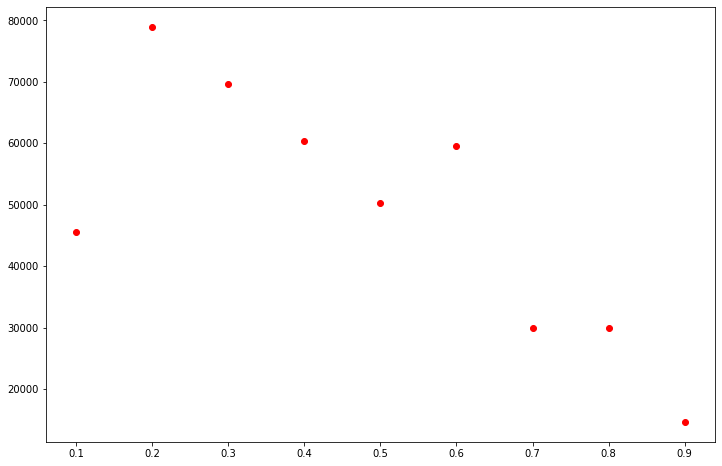

In [43]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(EPSILONs, results[:,1], 'ro')

## Analysis

The results show that for a bandit with 7 arms a high exploration rate is optimal. 

## Obeservation

A question can now be asked if 0.8 is the optimal soloution or if the epsilon value can be tuned further as a value between 0.7 and 0.9.

## Experiment 2

Vary epsilon in 0.02 increments between 0.7 and 0.9 exclusively. That is epsilon values of:
    0.72, 0.74, 0.76, 0.78, 0.8, 0.82, 0.84, 0.86, 0.88.

In [152]:
results = []
EPSILONs =[0.72, 0.74, 0.76, 0.78, 0.8, 0.82, 0.84, 0.86, 0.88]
for EPSILON in EPSILONs:
    results.append([EPSILON, agent.experiment(N_EPISODES, EPSILON)])
results

[[0.72,
  array([-1.00461453, -0.66866713, -0.27870669,  0.04897741,  0.32446451,
          0.99792508,  0.93614283])],
 [0.74,
  array([-1.03185488, -0.8933561 , -0.11867592,  0.0512613 ,  0.36508928,
          0.84043688,  1.48544323])],
 [0.76,
  array([-1.23054273, -0.70295905, -0.3897244 ,  0.03646013,  0.58572287,
          1.00740496,  1.20093968])],
 [0.78,
  array([-1.0888543 , -0.75966708, -0.33963221,  0.0062157 ,  0.36584656,
          0.82951012,  1.48576178])],
 [0.8,
  array([-1.16275052, -0.7566776 , -0.37407953, -0.22472879,  0.40813589,
          0.78785152,  1.47167662])],
 [0.82,
  array([-1.45812863, -0.78188359, -0.4098373 , -0.03367179,  0.42815015,
          0.7852978 ,  1.47340474])],
 [0.84,
  array([-1.2964824 , -0.77444456, -0.32166178, -0.0464197 ,  0.48137799,
          0.95002931,  1.29517768])],
 [0.86,
  array([-1.19030105, -0.96665863, -0.50689261, -0.24378577,  0.3452928 ,
          0.91481173,  1.44678079])],
 [0.88,
  array([-1.24811081, -0.8229267 

In [153]:
ESTIMATE_INDEX = 1
score = []
for epsilon_index in range(len(EPSILONs)):
    score.append(np.average(abs(results[epsilon_index][ESTIMATE_INDEX] - bandit.n_normal_distributions[:,bandit.MU_INDEX])))

score

[0.2626366624387887,
 0.18805785592256538,
 0.15791744514843045,
 0.16242052232931373,
 0.18050815804832143,
 0.09956708320676959,
 0.13246371178859953,
 0.12669048114295997,
 0.16603525761572507]

## Visualisation for Experiment 2

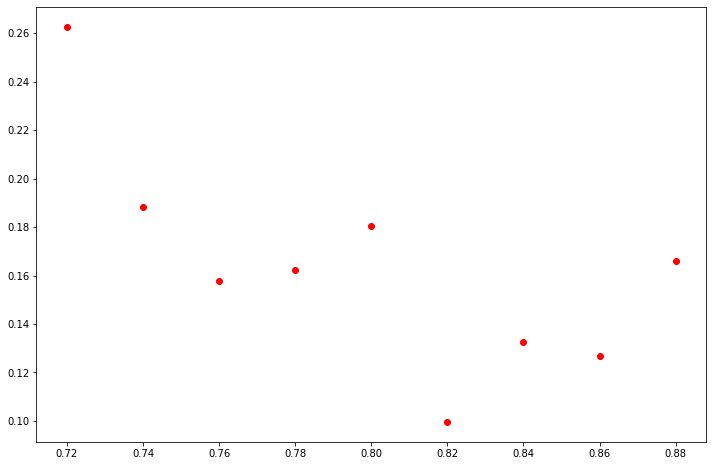

In [154]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(EPSILONs, score, 'ro')